## Visualization

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
from dsb.training.config_training import config 
from dsb.preprocessing.step1 import *
from dsb.preprocessing.full_prep import lumTrans
from dsb.layers import nms,iou

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [67]:
# img = np.load('/work/DataBowl3/stage2/preprocess_1/d7850f462f15f4e8a21bf883450a505c_clean.npy')
npy_dir = 'F:\\LargeFiles\\lfz\\prep_result\\'
# patient_id = '0015ceb851d7251b8f399e39779d1e7d'
patient_id = '0030a160d58723ff36d73f41b170ec21'
img = np.load(npy_dir + patient_id +'_clean.npy')
pbb = np.load(npy_dir + patient_id +'_pbb.npy')

In [68]:

def show_nodule_with_index(img, pbb, index=0):
    # Probabilities threshold
    pbb = pbb[pbb[:,0]>-1]
    # NMS : Non-max suppression
    # Remove overlapping boxes.
    pbb = nms(pbb,0.05)
    nodule_count = pbb.shape[0]
    print('Number of nodules: ', nodule_count)
    if nodule_count <=0:
        print('no nodules')
        return
    if index > nodule_count - 1:
        index = nodule_count - 1
    box = pbb[index].astype('int')[1:]
    ax = plt.subplot(1,1,1)
    plt.imshow(img[0,box[0]],'gray') # slice by z axis of the box - box[0].
    plt.axis('off')
    rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
    ax.add_patch(rect)

Number of nodules:  8


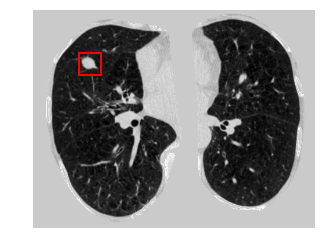

In [70]:
show_nodule_with_index(img, pbb, 0)

Number of nodules:  8


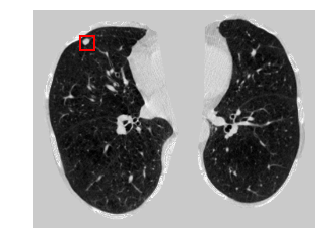

In [69]:
show_nodule_with_index(img, pbb, 1)

## Break down

In [71]:
pbb.shape

(141, 5)

## Probabilities threshold

In [72]:
pbb = pbb[pbb[:,0]>-1]

In [73]:
pbb.shape

(72, 5)

## NMS : Non-max suppression
Remove overlapping boxes.

In [74]:
pbb = nms(pbb,0.05)

In [75]:
print('Number of nodules: ', pbb.shape[0])

Number of nodules:  8


In [76]:
nodule_index = 0
box = pbb[nodule_index].astype('int')[1:]

### box
```
0: z
1: y
2: x
3: r
```

In [77]:
box

array([137,  53,  56,  11])

In [78]:
img.shape

(1, 310, 216, 280)

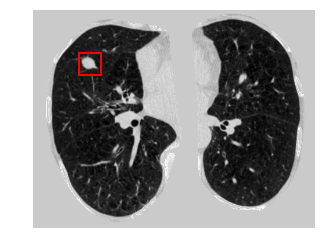

In [79]:
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray') # slice by z axis of the box - box[0].
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)
